# Glassdoor Job Reviews: Exploratory Data Analysis

Link to the Data: https://www.kaggle.com/datasets/davidgauthier/glassdoor-job-reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
reviews_df = pd.read_csv('glassdoor_reviews.csv')

### 1. Introduction

#### This notebook outlines an Exploratory Data Analysis (EDA) of the "Glassdoor Job Reviews" dataset. Glassdoor is a platform that allows current and former employees to review the companies they've worked at, providing ratings of several different metrics, and listing the pros and cons of their experience working there.

In [ ]:
reviews_df.shape

(838566, 18)

In [ ]:
reviews_df.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

#### The data collected for analysis consists of 838,566 rows across 18 columns focusing primarily on UK based firms, with the data stored in the columns ranging from information about the company, the job title, different scores for metrics such as work-life balance and diversity, whether the reviewer recommends working at the respective firm, as well as a brief pros and cons list of working at that company.

#### The stages of the EDA outlined in this notebook will consist of:
- The Data Cleaning Stage
- The Data Summary Stage
- The Data Analysis Stage

## 2. Data Cleaning

### a. Determining and handling null values

#### We should first get an idea of how many nulls we have and where they're located.

In [ ]:
# Find sum of total nulls in each column

reviews_df.isna().sum().to_frame(name = 'Total Nulls')

,Total Nulls
firm,0
date_review,0
job_title,0
current,0
location,297338
overall_rating,0
work_life_balance,149894
culture_values,191373
diversity_inclusion,702500
career_opp,147501


#### Are there any additional empty values in the table that were not detected as nulls?

In [ ]:
# Checking for blank space entries in the job_title column.

filter = reviews_df['job_title'] == ' '
reviews_df[filter].head(3)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
66,AJ-Bell,2015-07-01,,"Former Employee, more than 3 years",NaN,3,4.0,1.0,NaN,2.0,2.0,2.0,x,v,x,Average company,Good team work\r\nLife / work balance,No development\r\nLack of leadership\r\nPoor l...


In [ ]:
# Checking every text column for blank space nulls

count_of_nulls = {}
keys = reviews_df.select_dtypes(include = 'object') # Select only the columns that are of type object

# Creating a dictionary to count blank spaces for each column
for column in reviews_df.columns:
    for key in keys:
        filter = reviews_df[key] == ' '
        count_of_nulls[key] = reviews_df[key][filter].count()

nulls = pd.DataFrame(count_of_nulls, index = ['Blank Space Nulls'])
nulls.T

,Blank Space Nulls
firm,0
date_review,0
job_title,79065
current,0
location,0
recommend,0
ceo_approv,0
outlook,0
headline,0
pros,0


#### There were, in fact, additional empty values in the "job_title" column that were not initially detected. We now handle these by replacing them with a meaningful placeholder derived from other values in the column.

In [ ]:
# Replace all blank spaces with placeholder string
reviews_df.job_title = reviews_df.job_title.replace(' ', 'Anonymous Employee')

# Verify that the values have changed
job_filter = reviews_df['job_title'] == 'Anonymous Employee'
reviews_df[job_filter].head(3)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,Anonymous Employee,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
3,AFH-Wealth-Management,2016-04-16,Anonymous Employee,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
66,AJ-Bell,2015-07-01,Anonymous Employee,"Former Employee, more than 3 years",NaN,3,4.0,1.0,NaN,2.0,2.0,2.0,x,v,x,Average company,Good team work\r\nLife / work balance,No development\r\nLack of leadership\r\nPoor l...


#### Now we can handle the nulls in all the other columns. Nulls in a text column are replaced with a placeholder, while Nulls in numeric columns are replaced with zeroes.

In [ ]:
# Handling nulls in text columns
reviews_df.location.fillna('Not Given', inplace = True)
reviews_df.headline.fillna('N/A', inplace = True)
reviews_df.cons.fillna('N/A', inplace = True)

# Handling nulls in numeric columns
reviews_df.work_life_balance.fillna(0, inplace = True)
reviews_df.culture_values.fillna(0, inplace = True)
reviews_df.diversity_inclusion.fillna(0, inplace = True)
reviews_df.career_opp.fillna(0, inplace = True)
reviews_df.comp_benefits.fillna(0, inplace = True)
reviews_df.senior_mgmt.fillna(0, inplace = True)

In [ ]:
# Verify that there are no longer any nulls in the dataset

reviews_df.isna().sum().to_frame(name = 'Total Nulls')

,Total Nulls
firm,0
date_review,0
job_title,0
current,0
location,0
overall_rating,0
work_life_balance,0
culture_values,0
diversity_inclusion,0
career_opp,0


### b. Validating Data Types

#### Checking each column to verify that it has the correct datatype

In [ ]:
reviews_df.dtypes

firm                    object
date_review             object
job_title               object
current                 object
location                object
overall_rating           int64
work_life_balance      float64
culture_values         float64
diversity_inclusion    float64
career_opp             float64
comp_benefits          float64
senior_mgmt            float64
recommend               object
ceo_approv              object
outlook                 object
headline                object
pros                    object
cons                    object
dtype: object

#### The date_review column should be of type datetime, we can change that now.

In [ ]:
reviews_df.date_review = reviews_df.date_review.astype({'date_review' : 'datetime64[ns]'})

# Verifying that the date_review column is now the correct type.
reviews_df.dtypes

firm                           object
date_review            datetime64[ns]
job_title                      object
current                        object
location                       object
overall_rating                  int64
work_life_balance             float64
culture_values                float64
diversity_inclusion           float64
career_opp                    float64
comp_benefits                 float64
senior_mgmt                   float64
recommend                      object
ceo_approv                     object
outlook                        object
headline                       object
pros                           object
cons                           object
dtype: object

### c. Reformatting Column Values

#### The format of the values in the location column makes it difficult to perform categorical analysis on it.

In [ ]:
reviews_df.location.nunique()

14488

#### There are almost 14,500 unique values in the location column. Assuming the exact address does not provide any meaningful insights, then we can truncate the values to include only the major location listed, making analysis more focused and effective.

In [ ]:
location_cleaned = []

# Split location names by commas and take only the last segment.
for i in range(0, len(reviews_df.location)):
    location_cleaned.append(reviews_df.location[i].split(",")[-1].strip())

In [ ]:
# Verify that the locations have been changed.

reviews_df.location = location_cleaned
reviews_df.head(3)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,Anonymous Employee,Current Employee,Not Given,2,4.0,3.0,0.0,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year",England,2,3.0,1.0,0.0,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year",England,1,1.0,1.0,0.0,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."


In [ ]:
# Updated number of locations after changes

reviews_df.location.nunique()

3463

#### There are still some issues we can address. First, we can convert abbreviated state names to their full state names with the help of an imported dictionary.

In [ ]:
# Dictionary of state abbreviation and state name key-pair values
from us_state_abbrev import abbrev_to_us_state

states_cleaned = []

for i in range(0, len(reviews_df.location)):
    if reviews_df.location[i] in abbrev_to_us_state:
        states_cleaned.append(abbrev_to_us_state[reviews_df.location[i]])
    else:
        states_cleaned.append(reviews_df.location[i])

In [ ]:
# Re-verify number of locations after change

reviews_df.location = states_cleaned
reviews_df.location.nunique()

3459

In [ ]:
# Verify that states are correctly formatted now

state_filter = reviews_df.location == 'New York'
reviews_df[state_filter].head(3)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
700,ALDI,2020-08-08,Retail Store Assistant,"Former Employee, more than 3 years",New York,1,3.0,1.0,0.0,1.0,3.0,1.0,x,r,x,don't get fooled,"The pay, thats how they keep people for so long.","management are awful, they stand idle whilst y..."
701,ALDI,2020-08-08,Store Assistant,Current Employee,New York,3,0.0,0.0,0.0,0.0,0.0,0.0,o,o,o,Aldi,"Good pay , team , work fast",Not enough hours for all the staff
707,ALDI,2020-08-13,Stock Assistant,"Former Employee, more than 1 year",New York,3,2.0,2.0,0.0,3.0,4.0,2.0,v,r,r,Good wages,Good wages\r\nfloor staff generally ok,Most deputy managers power hungry and unnecess...


#### The "current" column also has redundant categories that we can simplify, as well as some error values.

In [ ]:
reviews_df.current.unique()

array(['Current Employee', 'Current Employee, more than 1 year',
       'Current Employee, less than 1 year', 'Former Employee',
       'Current Employee, more than 5 years',
       'Former Employee, more than 1 year',
       'Former Employee, more than 3 years',
       'Former Employee, more than 5 years',
       'Current Employee, more than 3 years',
       'Current Employee, more than 8 years',
       'Former Employee, less than 1 year',
       'Former Employee, more than 8 years',
       'Current Employee, more than 10 years',
       'Former Employee, more than 10 years',
       'Former Contractor, less than 1 year',
       'Former Intern, less than 1 year',
       'Current Contractor, less than 1 year', 'Former Contractor',
       'Former Intern, more than 1 year', 'Current Contractor',
       'Former Intern', 'Current Intern, less than 1 year',
       'Current Contractor, more than 1 year',
       'Former Contractor, more than 1 year',
       'Former Contractor, more than 8 years

In [ ]:
current_cleaned = []

# Split current name into seperate words and take only the first word, 'Current' or 'Former'
for i in range(0, len(reviews_df.location)):
    current_cleaned.append(reviews_df.current[i].split()[0])

In [ ]:
# Replace "Current" column with cleaned result
reviews_df.current = current_cleaned

# Verify new "Current" values
reviews_df.current.unique()

array(['Current', 'Former', 'KEY'], dtype=object)

#### Fortunately, both error values KEY seem to indicate that they represent the "Former" status, so we can replace the values "KEY" with "Former" directly.

In [ ]:
# Replace "KEY" error values with "Former"
reviews_df.current = reviews_df.current.replace('KEY', 'Former')

# Verify that only Current and Former values remain in the "Current" column
reviews_df.current.unique()

array(['Current', 'Former'], dtype=object)

### d. Handling Duplicate Rows

#### Now that we have finished all other relevant data cleaning tasks, we can check for any duplicate rows in the table. If any are found, we can drop them.

In [ ]:
# Check for the total amount of duplicate rows
len(reviews_df)-len(reviews_df.drop_duplicates())

33612

In [ ]:
# Drop duplicates from the table
reviews_df = reviews_df.drop_duplicates()

# Verify that there are no longer duplicate rows in our table
len(reviews_df)-len(reviews_df.drop_duplicates())

0

#### We are now done with the data cleaning process, and we can use Pandas to save our clean dataframe to a new CSV which we can explore and analyze in our later stages.

In [ ]:
reviews_df.to_csv('glassdoor_reviews_clean.csv', index=False)

## 3. Data Summary

In [3]:
# Initializing new cleaned dataframe.

reviews_clean_df = pd.read_csv('glassdoor_reviews_clean.csv')

In [10]:
# Verifying number of rows and columns in the new dataframe.

reviews_clean_df.shape

(804954, 18)

### a. General Information

#### The describe() function is a very valuable tool when beginning the data summary stage, as it can give you many insights on the data distribution, ranges, and top values of our columns that we can use to decide which columns to take a closer look at.

In [6]:
# Using the describe function, we can get a general sense of the dataset including the ranges and bounds for each column

reviews_clean_df.replace(0, np.nan).describe(include = 'all')

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
count,804954,804954,804954,804954,804611,804954.000000,660906.000000,621604.000000,130872.000000,663240.000000,660724.000000,655163.000000,804954,804954,804954,802855,804954,804946
unique,428,4813,62275,2,3458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,390455,778560,777134
top,IBM,2021-01-13,Anonymous Employee,Current,Not Given,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v,o,v,Good,Great company to work for,None that I can think of
freq,49287,1705,155833,471133,285090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411066,298417,290085,13706,697,1128
mean,NaN,NaN,NaN,NaN,NaN,3.656983,3.374781,3.590657,3.964240,3.459003,3.402238,3.178543,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.177029,1.306841,1.325228,1.193149,1.274124,1.220944,1.332907,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Now that the date column is correctly formatted, we can determine the temporal scope of the dataset by finding the date of the oldest and latest review included.

In [25]:
oldest_review_date = reviews_clean_df['date_review'].min()
latest_review_date = reviews_clean_df['date_review'].max()

print(oldest_review_date)
print(latest_review_date)

2008-01-31
2021-06-08


#### The dataset includes spans a wide date range totaling 13 years, with the oldest review included submitted in early 2008, and the latest review submitted in the middle of 2021.

### b. Summary Statistics

#### The "recommend" column includes an employee's response on whether they recommend, don't recommend, or have no opinion on working for a particular firm, denoted by 'v', 'x', and 'o' respectively in the data. The percent distribution of these responses for the entire dataset is listed below.

In [ ]:
# Percentage distribution of responses for the "Recommend" column

reviews_clean_df.recommend.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

v    51.1%
o    27.9%
x    21.1%
Name: recommend, dtype: object

#### Looking at the describe() function we can see that some values are repeated in text columns such as "headline", "pros", and "cons". Using the value_counts() function we can take a look at the most frequently repeated responses in these sections.

In [7]:
reviews_clean_df.headline.value_counts().to_frame().head(5)

,headline
Good,13706
Great place to work,10923
Great,6070
Great company,5952
Good place to work,5812


In [8]:
reviews_clean_df.pros.value_counts().to_frame().head(5)

,pros
Great company to work for,697
Good company to work for,567
Great people to work with,490
Work life balance is good,439
Good people to work with,292


In [9]:
reviews_clean_df.cons.value_counts().to_frame().head(5)

,cons
None that I can think of,1128
None that I can think of.,432
None I can think of,332
Nothing I can think of,230
Long hours during busy season,214


#### We can use the sample() function to pull random samples from the Pros and Cons columns and get a general idea of often mentioned attributes in these columns.

In [ ]:
reviews_clean_df.cons.value_counts().to_frame().sample(5)

,cons
company is working on improving work life balance,1
Things in the restaurant were very disorganized,1
"Bureaucracy, you are seen as a number- very hard to distinguish yourself since it is so large",1
- Poor transparency + feedback when it comes to promotion\r\n- Very little say in where you end up,1
"management - old school, badly educated",1


## 4. Data Analysis

### __a. What is the correlation between the overall rating of the review and the current status of the employee at the company?__

#### To answer this question, we can find the distribution of current and former employees compared to the overall rating, both for when the overall rating is high and for when the overall rating is low.

In [11]:
# Create a filter that shows only rows where the rating was 4 or 5.

high_ratings_filter = reviews_clean_df.overall_rating > 3

# Compare Current and Former values as percentages.

reviews_clean_df[high_ratings_filter].current.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

Current    63.6%
Former     36.4%
Name: current, dtype: object

In [12]:
# Create a filter that shows only rows where the rating was 1 or 2.

low_ratings_filter = reviews_clean_df.overall_rating < 3

# Compare Current and Former values as percentages.

reviews_clean_df[low_ratings_filter].current.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

Former     55.2%
Current    44.8%
Name: current, dtype: object

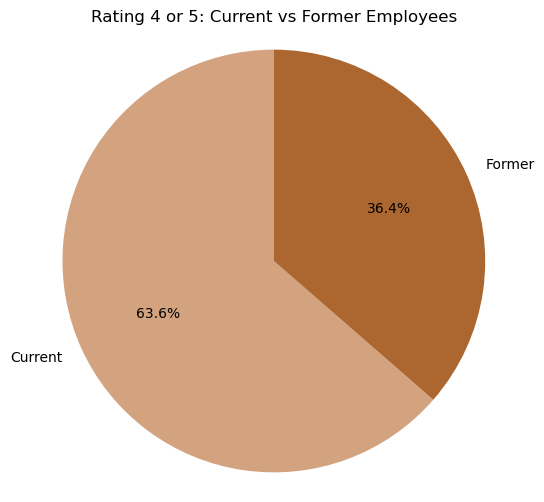

In [21]:
labels = ['Current', 'Former']

high_values = reviews_clean_df[high_ratings_filter].current.value_counts(normalize = True).mul(100).round(1)
x = high_values[0]
y = high_values[1]

sizes = [x, y]
colors = ['#D3A27F', '#AC6730']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Rating 4 or 5: Current vs Former Employees')
plt.axis('equal')
plt.show()

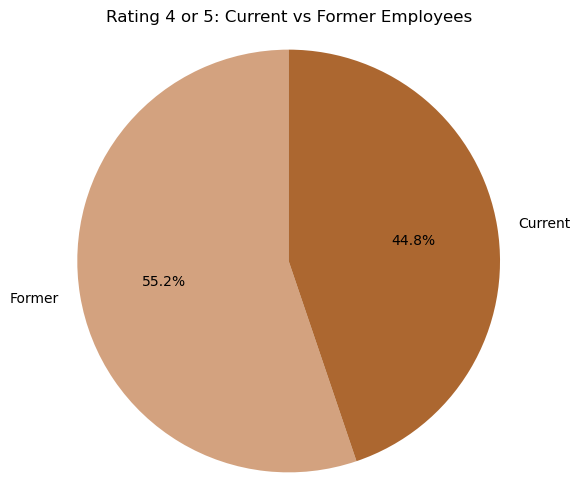

In [22]:
labels = ['Former', 'Current']

low_values = reviews_clean_df[low_ratings_filter].current.value_counts(normalize = True).mul(100).round(1)
x = low_values[0]
y = low_values[1]

sizes = [x, y]
colors = ['#D3A27F', '#AC6730']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Rating 4 or 5: Current vs Former Employees')
plt.axis('equal')
plt.show()

#### The pie charts above show us the employee status distribution for high-rated reviews and low-rated reviews respectively. The results heavily suggest that employees that rate their firm more favorably are more likely to stay at the company, while employees who give a negative rating are more likely to have left. It can be assumed that current employees who have given a low review score are also more likely to become former employees.

### __b. Which companies have the highest average ratings? Which companies have the lowest average ratings? What metrics are predictors of a higher rating, and which predict a lower rating?__

#### In answering this question, we can group the values of all of the reviews for each firm, find the average values for our relevant metrics, and then sort each firm by descending overall rating.

In [ ]:
no_nulls_df = reviews_clean_df.replace(0, np.nan)

average_ratings = no_nulls_df.groupby('firm')[
    ['overall_rating', 'work_life_balance', 'culture_values',
     'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt']
].mean(numeric_only=True).sort_values(by = 'overall_rating', ascending = False)
average_ratings

,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
firm,,,,,,,
The-Survey-Association,5.000000,3.333333,4.666667,5.000000,4.666667,4.000000,3.666667
Time-Etc,4.785714,4.700000,4.775000,4.777778,4.658537,4.410256,4.789474
Northern-Gas-and-Power,4.719682,4.750000,4.708075,4.517241,4.688660,4.756198,4.683884
CarShop-UK,4.651163,4.127572,4.597510,4.363636,4.553719,4.508264,4.576763
Michelmores,4.610390,4.588235,4.632353,4.000000,4.382353,4.323529,4.313433
...,...,...,...,...,...,...,...
Diligenta,2.363636,2.847826,2.195652,2.759259,1.920290,1.942029,2.072464
Macdonald-Hotels-and-Resorts,2.330472,2.173709,2.188679,3.300000,2.391509,2.300469,2.080569
James-Hay-Partnership,2.311111,2.645570,2.287500,3.428571,2.125000,2.587500,2.000000


#### We can see that the three highest rated firms on average are "The Survey Association", "Time Etc", and "Northern Gas and Power", while the lowest rated firms on average are "The Range", "Creative Support", and "James Hay Partnership". Next, we can find correlation values for each of our metrics and, with the help of a heat map, visualize how strong of a correlation each metric has to the overall rating, and to each other. 

<Axes: >

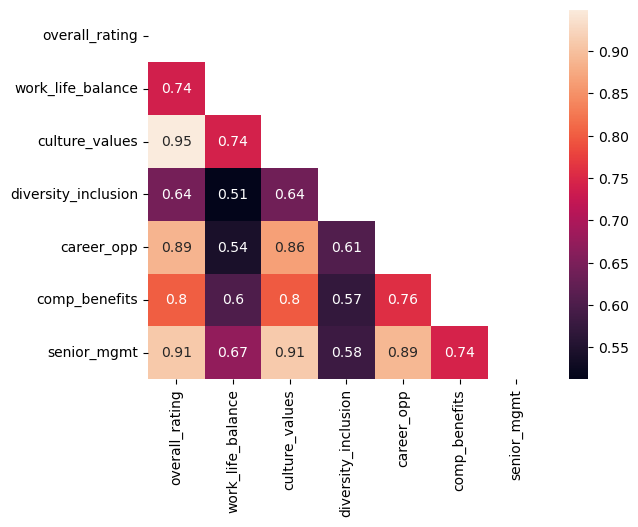

In [ ]:
# Find correlation values

corr = average_ratings.corr()

# Create heatmap of correlation values
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

#### The resulting heatmap shows that workplace culture, senior management, and career opportunity are the strongest indicators of a higher overall rating, with diversity and inclusion having the lowest impact overall.

### __c. What are the most commonly listed pros? What are the most commonly listed cons?__

#### The following sections of code rely on the PyTorch and Transformers libraries. If you would like to run the code and have not installed them, then run the following commands found below.

In [ ]:
# pip install torch
# pip install transformers

#### Since the pros and cons columns are textual columns submitted by users, they cannot be evaluted to find the pros and cons directly. In order to do this, we rely on the Bart-Large language model to evaluate the text and categorize it into different common pros and cons.

In [3]:
from transformers import pipeline

In [4]:
# Initialize Bart-Large classifier model

classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


#### We can create a dictionary of typical Pros and Cons categories determined by viewing random samples of these column values during the earlier exploration phase. The classifier model will then attempt to determine which specific Pros and Cons are referenced in each review based on their meaning.

In [47]:
# Create a dictionary of common "Pros" categories to count their frequency.

candidate_label_pros = {
  "Good Pay" : 0,
  "Good Management" : 0,
  "Good Work Life Balance" : 0,
  "Good Work Environmment" : 0,
  "Diverse Culture" : 0,
  "Creativity Encouraged" : 0,
  "Friendly Coworkers" : 0,
  "Good Career Outcomes" : 0,
  "No Positives" : 0
}

# Pull a sample of 100 rows from the dataset for evaluation.

sequence_to_classify = reviews_clean_df.pros.sample(100)

In [48]:
# Determine classification values for each "Pros" text in our sample list.

for i in range(len(sequence_to_classify)):
    candidate_labels = list(candidate_label_pros.keys())
    result = classifier(sequence_to_classify.iloc[i], candidate_labels, multi_label = True)

# Increase the value of a category if the classification value is higher than 0.5.

    for label, score in zip(result['labels'], result['scores']):
        if score >= 0.5:
            candidate_label_pros[label] += 1

print(candidate_label_pros)

{'Good Pay': 44, 'Good Management': 86, 'Good Work Life Balance': 65, 'Good Work Environmment': 80, 'Diverse Culture': 62, 'Creativity Encouraged': 44, 'Friendly Coworkers': 47, 'Good Career Outcomes': 68, 'No Positives': 2}


In [49]:
# Create a dictionary of common "Cons" categories to count their frequency.

candidate_label_cons = {
  "Bad Pay" : 0,
  "Bad Management" : 0,
  "Bad Work Life Balance" : 0,
  "Bad Work Environmment" : 0,
  "Discrimination" : 0,
  "Too Corporate" : 0,
  "Bad Benefits" : 0,
  "Poor Career Outcomes" : 0,
  "No Negatives" : 0
}

# Pull a sample of 100 rows from the dataset for evaluation.

sequence_to_classify = reviews_clean_df.cons.sample(100)

In [50]:
# Determine classification values for each "Cons" text in our sample list.

for i in range(len(sequence_to_classify)):
    candidate_labels = list(candidate_label_cons.keys())
    result = classifier(sequence_to_classify.iloc[i], candidate_labels, multi_label = True)

# Increase the value of a category if the classification value is higher than 0.5.

    for label, score in zip(result['labels'], result['scores']):
        if score >= 0.5:
            candidate_label_cons[label] += 1

print(candidate_label_cons)

{'Bad Pay': 23, 'Bad Management': 50, 'Bad Work Life Balance': 41, 'Bad Work Environmment': 55, 'Discrimination': 12, 'Too Corporate': 21, 'Bad Benefits': 22, 'Poor Career Outcomes': 32, 'No Negatives': 11}


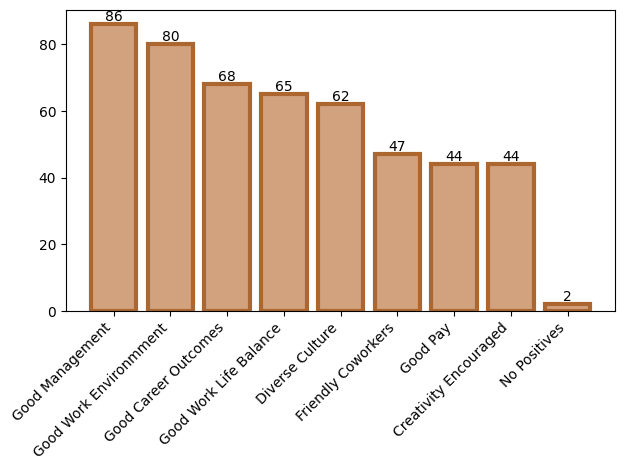

In [75]:
sorted_pros = dict(sorted(candidate_label_pros.items(), key=lambda x: x[1], reverse=True))

x = list(sorted_pros)
y = list(sorted_pros.values())
bars = plt.bar(x, y, facecolor = '#d2a27f', edgecolor = '#ac6730', linewidth = 3)

plt.bar_label(bars)
plt.title('')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

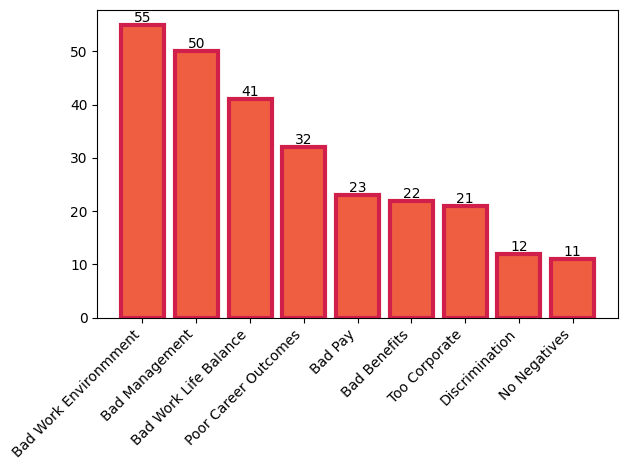

In [81]:
sorted_cons = dict(sorted(candidate_label_cons.items(), key=lambda x: x[1], reverse=True))

x = list(sorted_cons)
y = list(sorted_cons.values())
bars = plt.bar(x, y, facecolor = '#f05e42', edgecolor = '#d11f4c', linewidth = 3)

plt.bar_label(bars)
plt.title('')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The resulting bar charts display the most frequently discussed Pros as well as the most frequently discussed Cons in our sample slice of the dataset. We can see from our classification results that in both the Pros column and the Cons column, work environment, management, work life balance, and career outcomes are the most likely attributes to be listed, whether positively or negatively.

## 5. Conclusion

#### The Exploratory Data Analysis (EDA) consisted of successful cleaning of most of the important values found in the dataset, including null handling, removing duplicate rows, as well as several columns being reformatted to become more usable. The Summary and Analysis stages yielded many valuable insights into the kind of information that can be gleamed from this dataset, as well as determining the answer to several key questions regarding the data. It was determined through exploration of the data that the overall rating of each review had a direct impact on the likelihood of an employee staying or leaving a firm. Furthermore, through analysis of the more specific numeric ratings provided by employees on their reviews, the degree of impact that several key qualities of a workplace had on the overall rating was inferred. Finally, the textual responses in the Pros and Cons columns were analyzed and summarized into discrete categories, through which we could determine what aspects of working at a firm an employee was most likely to consider in their review. The dataset proved to be feature rich with high quality data, and much further analysis can be conducted on the reformatted data, especially with regards to columns that were not covered in the scope of this report, such as the location of the firm and the recommendation values.